In [151]:
import pandas as pd

In [152]:
df = pd.read_excel('Downloads//dataset_financial.xlsx')

In [153]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions)
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021


In [154]:
df.shape

(9, 9)

In [155]:
df.isnull().sum()

Company                                                        0
Year                                                           0
Total Revenue (in millions)                                    0
Net Income (in millions)                                       0
Total Assets (in millions)                                     0
Total Liabilities (in millions)                                0
Operating Expenses(R & D)                                      0
Operating Expenses(Sales & Marketing, Other Administrative)    0
Total Cash Flow from Operating Activities (in millions)        0
dtype: int64

In [156]:
df.dtypes

Company                                                        object
Year                                                            int64
Total Revenue (in millions)                                    object
Net Income (in millions)                                        int64
Total Assets (in millions)                                      int64
Total Liabilities (in millions)                                 int64
Operating Expenses(R & D)                                       int64
Operating Expenses(Sales & Marketing, Other Administrative)     int64
Total Cash Flow from Operating Activities (in millions)         int64
dtype: object

In [157]:
df['Total Revenue (in millions)'] = df['Total Revenue (in millions)'].astype('int64')
df['Year']= df['Year'].astype('str')

In [158]:
df.dtypes

Company                                                        object
Year                                                           object
Total Revenue (in millions)                                     int64
Net Income (in millions)                                        int64
Total Assets (in millions)                                      int64
Total Liabilities (in millions)                                 int64
Operating Expenses(R & D)                                       int64
Operating Expenses(Sales & Marketing, Other Administrative)     int64
Total Cash Flow from Operating Activities (in millions)         int64
dtype: object

In [159]:
## statistical analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Revenue (in millions),9.0,217084.555556,133913.789489,53823.0,96773.0,198270.0,365817.0,394328.0
Net Income (in millions),9.0,59005.888889,38231.680758,5644.0,14974.0,72361.0,94680.0,99803.0
Total Assets (in millions),9.0,268669.111111,140780.645366,62131.0,106618.0,351002.0,352755.0,411976.0
Total Liabilities (in millions),9.0,176252.333333,112621.131472,30548.0,43009.0,198298.0,287912.0,302083.0
Operating Expenses(R & D),9.0,17793.333333,11271.159446,2593.0,3969.0,21914.0,26251.0,29915.0
"Operating Expenses(Sales & Marketing, Other Administrative)",9.0,18727.222222,10964.933205,3946.0,4800.0,24932.0,25224.0,30334.0
Total Cash Flow from Operating Activities (in millions),9.0,36520.555556,22057.674153,7021.0,8769.0,45940.0,52237.0,57529.0


In [160]:
## calculating year-over-year changes for each financial metric
df = df.sort_values(by=['Company', 'Year'])
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (in millions)'].pct_change() * 100
df['Assest growth (%)'] = df.groupby(['Company'])['Total Assets (in millions)'].pct_change()*100
df['Liabilities growth (%)'] = df.groupby(['Company'])['Total Liabilities (in millions)'].pct_change()*100
df['Cash flow growth (%)'] = df.groupby(['Company'])['Total Cash Flow from Operating Activities (in millions)'].pct_change()*100


In [161]:
## round them to three decimals

df['Revenue Growth (%)'] = df['Revenue Growth (%)'].round(3)
df['Net Income Growth (%)'] = df['Net Income Growth (%)'].round(3)
df['Assest growth (%)'] = df['Assest growth (%)'].round(3)
df['Liabilities growth (%)'] = df['Liabilities growth (%)'].round(3)
df['Cash flow growth (%)'] = df['Cash flow growth (%)'].round(3)


In [162]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assest growth (%),Liabilities growth (%),Cash flow growth (%)
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.794,5.411,0.499,4.922,16.994
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800,-2.814,-0.049,-3.855,6.821
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.956,18.715,9.306,3.393,13.707


In [163]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assest growth (%),Liabilities growth (%),Cash flow growth (%)
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.794,5.411,0.499,4.922,16.994
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800,-2.814,-0.049,-3.855,6.821
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.956,18.715,9.306,3.393,13.707


In [164]:
df = df.reset_index(drop = 'index')

In [165]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assest growth (%),Liabilities growth (%),Cash flow growth (%)
0,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
1,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.794,5.411,0.499,4.922,16.994
2,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800,-2.814,-0.049,-3.855,6.821
3,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
4,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.956,18.715,9.306,3.393,13.707


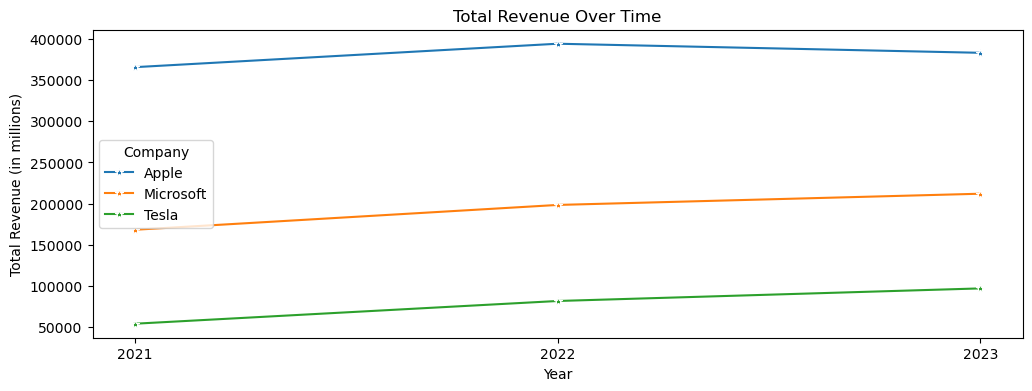

In [166]:
## plots

import matplotlib.pyplot as plt
import seaborn as sns

# Line chart for Total Revenue over time
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='Year', y='Total Revenue (in millions)',hue="Company", marker='*')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.show()

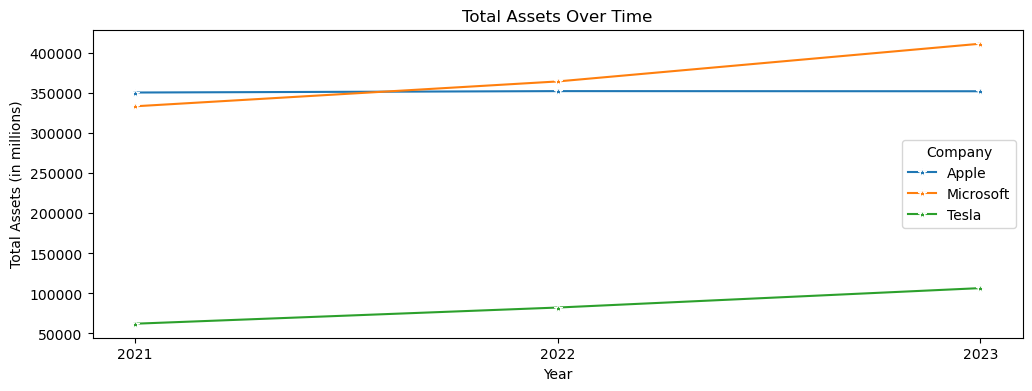

In [167]:
# Line chart for Total Assets over time
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='Year', y='Total Assets (in millions)',hue="Company", marker='*')
plt.title('Total Assets Over Time')
plt.ylabel('Total Assets (in millions)')
plt.xlabel('Year')
plt.show()

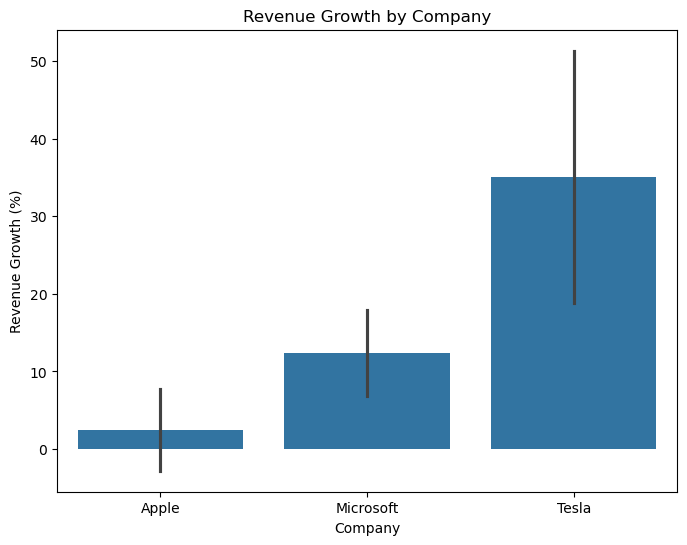

In [168]:
## bar plots

plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Revenue Growth (%)', data=df)
plt.title('Revenue Growth by Company')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Company')
plt.show()

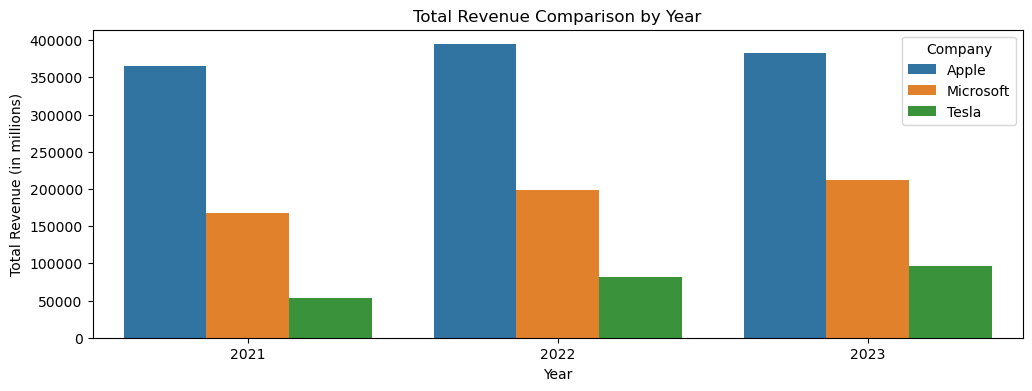

In [169]:
# Bar chart for Total Revenue comparison
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title('Total Revenue Comparison by Year')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

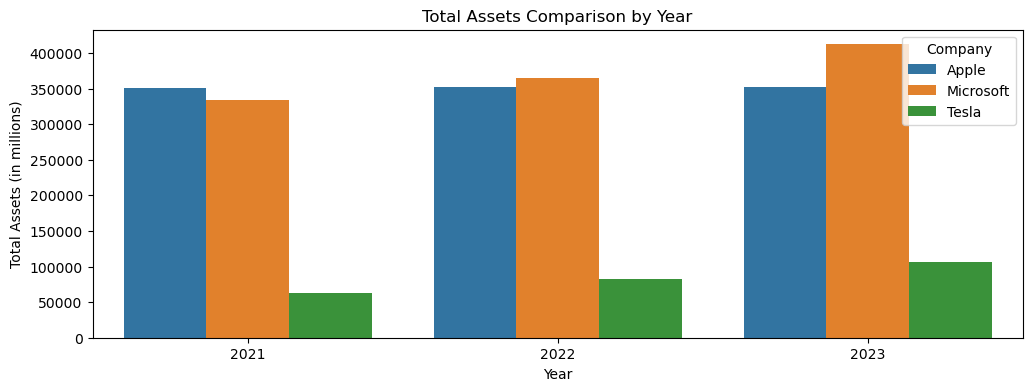

In [170]:
# total assets comparison

plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Total Assets (in millions)', hue='Company')
plt.title('Total Assets Comparison by Year')
plt.ylabel('Total Assets (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

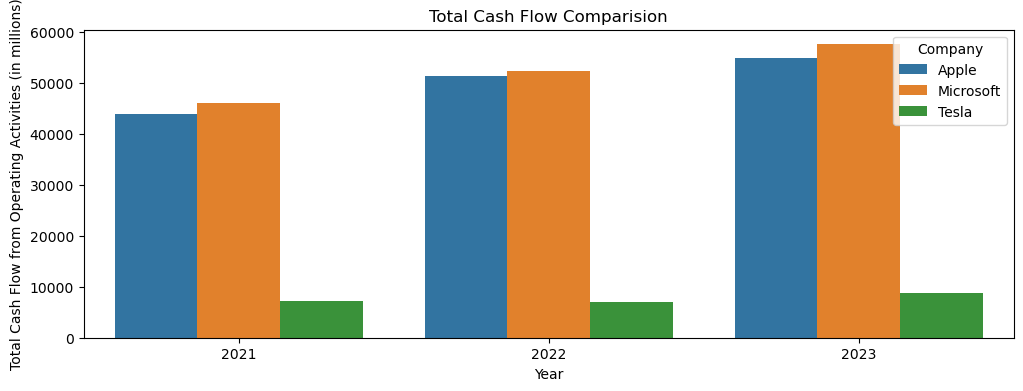

In [171]:
## Total Cash Flow from Operating Activities (in millions) comparison

plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Year',y='Total Cash Flow from Operating Activities (in millions)',hue='Company')
plt.title('Total Cash Flow Comparision')
plt.xlabel('Year')
plt.ylabel('Total Cash Flow from Operating Activities (in millions)')
plt.show()

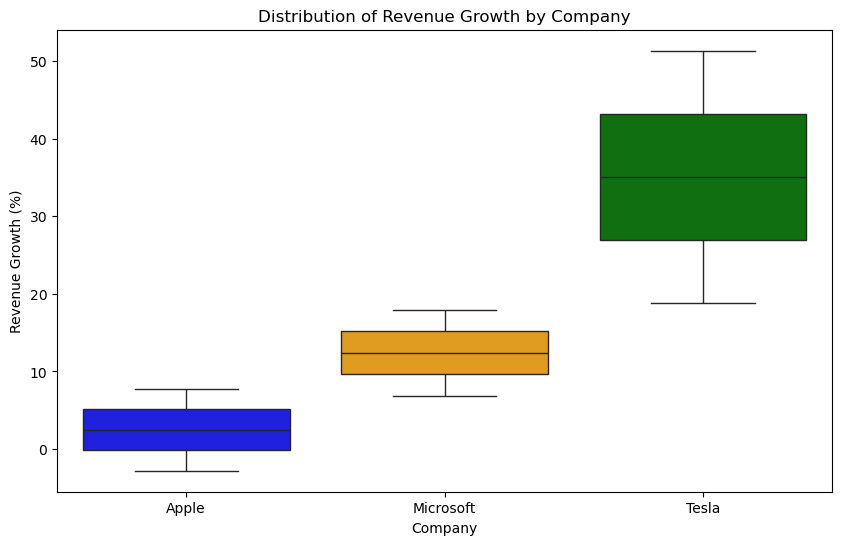

In [172]:
## box plot to check if any outliers and to get boundary of data

plt.figure(figsize=(10, 6))
sns.boxplot(data = df,x='Company', y='Revenue Growth (%)',hue = 'Company', palette=['blue','orange','green'])
plt.title('Distribution of Revenue Growth by Company')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Company')
plt.show()

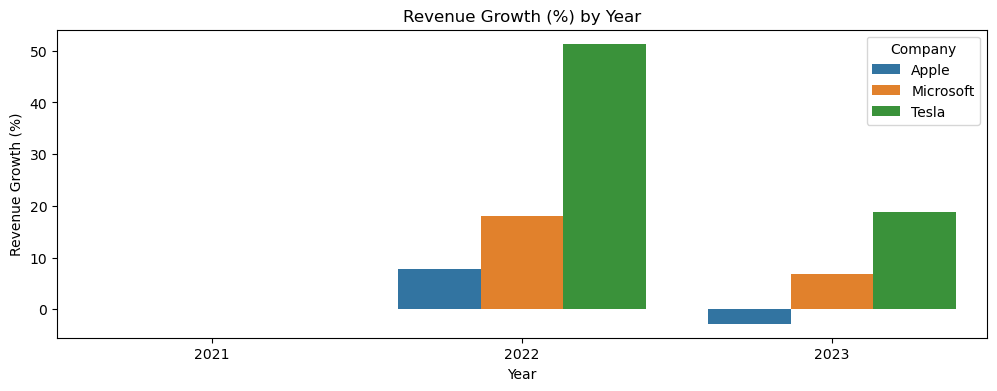

In [173]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.show()

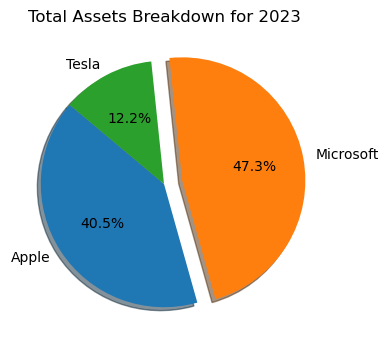

In [208]:
# Pie chart for the breakdown of Total Assets for the most recent year
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(6,4))
plt.pie(latest_assets, labels=latest_assets.index,explode = (0,0.15,0), autopct='%1.1f%%', startangle=140,shadow=True)
plt.title(f'Total Assets Breakdown for {latest_year}')
plt.show()

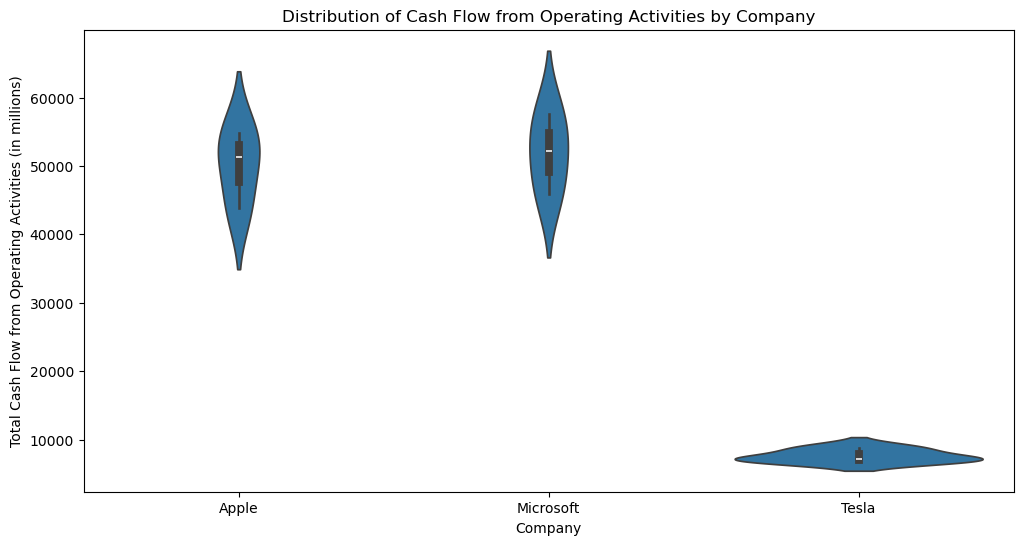

In [220]:
# Violin plot for Cash Flow from Operating Activities
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Company', y='Total Cash Flow from Operating Activities (in millions)')
plt.title('Distribution of Cash Flow from Operating Activities by Company')
plt.ylabel('Total Cash Flow from Operating Activities (in millions)')
plt.xlabel('Company')
plt.show()

## Summary:

### 1. Apple:

Experienced steady revenue growth in 2022 but a slight decline in 2023.

Net income followed a similar trend with growth in 2022 and a slight decline in 2023.

Total assets and liabilities remained relatively stable over the three years.

Significant cash flow growth in 2022, indicating strong operational efficiency, which continued at a slower rate in 2023.

### 2. Microsoft:

Showed strong revenue and net income growth in 2022, followed by a slowdown in 2023.

Notable growth in total assets, particularly in 2023, suggesting substantial investments or acquisitions.

Liabilities grew moderately, and cash flow from operations showed consistent growth, reflecting healthy operational performance.

### 3. Tesla:

Exhibited the highest revenue growth among the three companies, particularly in 2022.

Net income growth was exceptionally high in 2022, reflecting improved profitability.

Continued growth in total assets and liabilities, indicating expansion.

Despite a slight decline in cash flow from operations in 2022, Tesla showed a strong rebound in 2023, reflecting better cash management and operational efficiency.